### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 31369.1895
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 31116.7637
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 30879.6348
Epoch 4/300
1/1 [==============================] - 0s 20ms/step - loss: 30686.2969
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 30488.1348
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 30265.8438
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 30016.2188
Epoch 8/300
1/1 [==============================] - 0s 0s/step - loss: 29749.0293
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 29470.2598
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 29178.7598
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 28875.2637
Epoch 12/300
1/1 [==============================] - 0s 0s/step - loss: 28559.2090
Epoch 13/300


1/1 [==============================] - 0s 0s/step - loss: 17.0465
Epoch 101/300
1/1 [==============================] - 0s 7ms/step - loss: 17.2704
Epoch 102/300
1/1 [==============================] - 0s 16ms/step - loss: 17.4648
Epoch 103/300
1/1 [==============================] - 0s 0s/step - loss: 17.5703
Epoch 104/300
1/1 [==============================] - 0s 0s/step - loss: 17.5585
Epoch 105/300
1/1 [==============================] - 0s 16ms/step - loss: 17.4331
Epoch 106/300
1/1 [==============================] - 0s 16ms/step - loss: 17.2235
Epoch 107/300
1/1 [==============================] - 0s 0s/step - loss: 16.9732
Epoch 108/300
1/1 [==============================] - 0s 16ms/step - loss: 16.7285
Epoch 109/300
1/1 [==============================] - 0s 16ms/step - loss: 16.5259
Epoch 110/300
1/1 [==============================] - 0s 0s/step - loss: 16.3868
Epoch 111/300
1/1 [==============================] - 0s 16ms/step - loss: 16.3152
Epoch 112/300
1/1 [======================

1/1 [==============================] - 0s 7ms/step - loss: 4.1362
Epoch 202/300
1/1 [==============================] - 0s 16ms/step - loss: 4.0802
Epoch 203/300
1/1 [==============================] - 0s 16ms/step - loss: 4.0402
Epoch 204/300
1/1 [==============================] - 0s 0s/step - loss: 4.0254
Epoch 205/300
1/1 [==============================] - 0s 0s/step - loss: 4.0174
Epoch 206/300
1/1 [==============================] - 0s 0s/step - loss: 4.0109
Epoch 207/300
1/1 [==============================] - 0s 0s/step - loss: 4.0001
Epoch 208/300
1/1 [==============================] - 0s 22ms/step - loss: 3.9716
Epoch 209/300
1/1 [==============================] - 0s 16ms/step - loss: 3.9389
Epoch 210/300
1/1 [==============================] - 0s 0s/step - loss: 3.8919
Epoch 211/300
1/1 [==============================] - 0s 0s/step - loss: 3.8480
Epoch 212/300
1/1 [==============================] - 0s 0s/step - loss: 3.8132
Epoch 213/300
1/1 [==============================] - 0s 0

### Predicting For the next 10 data

In [11]:
# demonstrate prediction for next 10 days
x_input = [187, 196, 210]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = np.array(x_input).reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = np.array(x_input).reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.39249]
1 day input [196.         210.         222.39248657]
1 day output [[233.08542]]
2 day input [210.         222.39248657 233.0854187 ]
2 day output [[245.98845]]
3 day input [222.39249 233.08542 245.98845]
3 day output [[257.90872]]
4 day input [233.08542 245.98845 257.90872]
4 day output [[269.61603]]
5 day input [245.98845 257.90872 269.61603]
5 day output [[282.32895]]
6 day input [257.90872 269.61603 282.32895]
6 day output [[294.64212]]
7 day input [269.61603 282.32895 294.64212]
7 day output [[307.18326]]
8 day input [282.32895 294.64212 307.18326]
8 day output [[320.26443]]
9 day input [294.64212 307.18326 320.26443]
9 day output [[333.31476]]
[222.39249, 233.08542, 245.98845, 257.90872, 269.61603, 282.32895, 294.64212, 307.18326, 320.26443, 333.31476]


In [12]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
len(timeseries_data)

9

In [15]:
lst_output

[222.39249,
 233.08542,
 245.98845,
 257.90872,
 269.61603,
 282.32895,
 294.64212,
 307.18326,
 320.26443,
 333.31476]

In [22]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

### Visualizaing The Output

In [18]:
import matplotlib.pyplot as plt

In [19]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

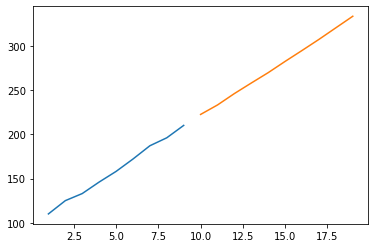

In [20]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
